# CNN chalenge

In this exercise, you will build a CNN to classify images from the Fashion MNIST dataset, train the model, evaluate its performance, and visualize predictions with a confusion matrix.

## Prepare the data

Load the Fashion MNIST dataset using Keras and display the first few images with their labels to get a sense of the data.

In [1]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Visualize 5 random images from the training set with their labels.

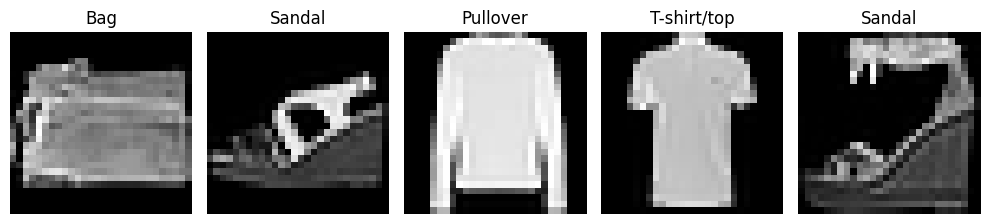

In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

indices = np.random.choice(len(x_train), 5, replace=False)

plt.figure(figsize=(10, 4))
for i, idx in enumerate(indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(class_names[y_train[idx]])
    plt.axis('off')

plt.tight_layout()
plt.show()

Reshape the data to include a channel dimension and confirm the new shape.

In [3]:
# Task: Reshape x_train and x_test to include the channel dimension
x_train.shape

(60000, 28, 28)

In [4]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [5]:
x_train.shape

(60000, 28, 28, 1)

In [6]:
x_test.shape

(10000, 28, 28, 1)

## Build the CNN model

Create a CNN with at least two convolutional layers, followed by max pooling layers, and a dense output layer.

Rememeber the `Conv2D`, `MaxPooling2D`, `Flatten`, `Dropout` and `Dense`layers.

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Task: Build your model here
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes no Fashion MNIST
])

Compile your model with an appropriate optimizer, loss function, and metric.

In [9]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

Train your model using model.fit(), setting a validation split of 20% and training for at least 10 epochs.

In [10]:
# Task: Train the model and store the training history in a variable
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=62,
    verbose=2)

Epoch 1/10
775/775 - 41s - 53ms/step - accuracy: 0.8138 - loss: 0.5128 - val_accuracy: 0.8697 - val_loss: 0.3665
Epoch 2/10
775/775 - 39s - 50ms/step - accuracy: 0.8800 - loss: 0.3298 - val_accuracy: 0.8824 - val_loss: 0.3205
Epoch 3/10
775/775 - 48s - 62ms/step - accuracy: 0.8977 - loss: 0.2805 - val_accuracy: 0.8949 - val_loss: 0.2940
Epoch 4/10
775/775 - 74s - 95ms/step - accuracy: 0.9074 - loss: 0.2513 - val_accuracy: 0.9032 - val_loss: 0.2756
Epoch 5/10
775/775 - 40s - 52ms/step - accuracy: 0.9161 - loss: 0.2277 - val_accuracy: 0.9071 - val_loss: 0.2535
Epoch 6/10
775/775 - 41s - 53ms/step - accuracy: 0.9251 - loss: 0.2043 - val_accuracy: 0.9083 - val_loss: 0.2486
Epoch 7/10
775/775 - 40s - 51ms/step - accuracy: 0.9307 - loss: 0.1866 - val_accuracy: 0.9103 - val_loss: 0.2541
Epoch 8/10
775/775 - 42s - 54ms/step - accuracy: 0.9378 - loss: 0.1671 - val_accuracy: 0.9082 - val_loss: 0.2622
Epoch 9/10
775/775 - 41s - 53ms/step - accuracy: 0.9441 - loss: 0.1510 - val_accuracy: 0.9157 - 

## Evaluate the model

Evaluate your model on the test set and print the test accuracy.

In [11]:
# Task: Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
test_accuracy

0.9139000177383423

Use your model to predict the labels for the test set. Display 5 test images with their predicted and true labels.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


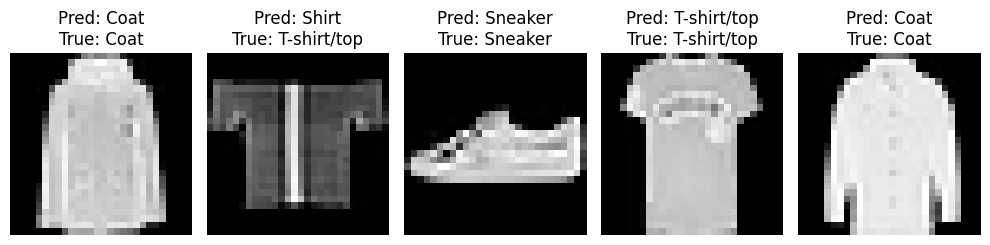

In [12]:
# Task: Use model.predict() and display predictions
# Your code here to display images with predicted and actual labels

predictions = model.predict(x_test)
y_pred = np.argmax(predictions, axis=1)
import matplotlib.pyplot as plt
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

indices = np.random.choice(len(x_test), 5, replace=False)
plt.figure(figsize=(10, 5))

for i, idx in enumerate(indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {class_names[y_pred[idx]]}\nTrue: {class_names[y_test[idx]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

Construct a confusion matrix to visualize how well your model performed across different classes.

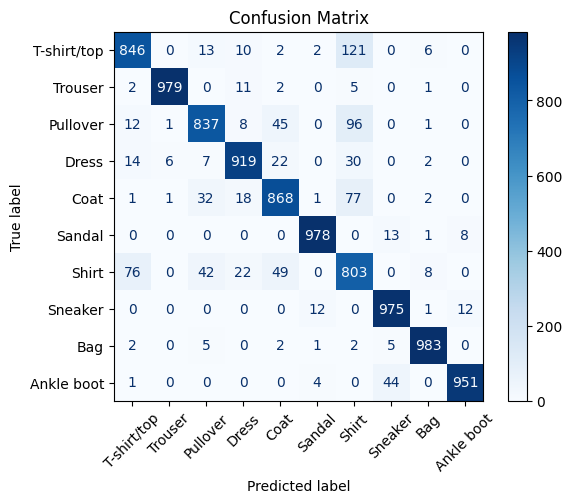

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Task: Create predictions and a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=45, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()